In [9]:
# python data manipulation and analysis library
import numpy as np

# python library supporting operations on multidimensional arrays and matrices 
import pandas as pd

# python plotting library for visualizations
import matplotlib.pyplot as plt

# data visualization library for python based on matplotlib providing higher level visual interface and options
import seaborn as sns

# bert topic modeling library
from bertopic import BERTopic

# Friday, Feb. 25, 2022
### MVP
🔲 Timeline of Enron closing monthly share prices ---> 1999 - 2002<br>
🔲 x3 Sentiment Scores for 1999 - 2002<br>
🔲 x3 Topic Models for 1999 - 2002<br>
🔲 Initial Hypothesis<br>
>🔲 x4 viz<br>
🔲 x2 stats tests

### Plan
- Go through team workbooks and compile code
- README.md finish for mvp
- Slides finish for mvp

### Importing working data

In [2]:
# reading csv to pandas df
df = pd.read_csv('csv_files/sentiment3.csv', index_col = False)

df.head()

,Unnamed: 0,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,qtr,day,time,date2
0,0,Monday,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,2,Monday,23:39:00,2001-05-14
1,1,Friday,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,2,Friday,20:51:00,2001-05-04
2,2,Wednesday,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,4,Wednesday,10:00:00,2000-10-18
3,3,Monday,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,4,Monday,13:13:00,2000-10-23
4,4,Thursday,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,3,Thursday,12:07:00,2000-08-31


### Cleaning up data, based on exploration and new project direction

In [3]:
# dropping columns do not need
df.drop(columns = ['Unnamed: 0', 'date', 'subject', 'qtr', 'day'], inplace = True)

# renaming date2 col
df.rename(columns = {'date2':'date'}, inplace = True)

df.head()

,file,sender,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,time,date
0,allen-p/_sent_mail/1.,phillip.allen@enron.com,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,23:39:00,2001-05-14
1,allen-p/_sent_mail/10.,phillip.allen@enron.com,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,20:51:00,2001-05-04
2,allen-p/_sent_mail/100.,phillip.allen@enron.com,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,10:00:00,2000-10-18
3,allen-p/_sent_mail/1000.,phillip.allen@enron.com,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,13:13:00,2000-10-23
4,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,12:07:00,2000-08-31


In [4]:
# looking at dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516796 entries, 0 to 516795
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   file          516796 non-null  object 
 1   sender        516796 non-null  object 
 2   content       516796 non-null  object 
 3   lemmatize     516513 non-null  object 
 4   sentiment     516796 non-null  float64
 5   polarity      516796 non-null  float64
 6   subjectivity  516796 non-null  float64
 7   poi           516796 non-null  bool   
 8   is_internal   516796 non-null  bool   
 9   year          516796 non-null  int64  
 10  month         516796 non-null  int64  
 11  time          516796 non-null  object 
 12  date          516796 non-null  object 
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 44.4+ MB


In [8]:
# changing dtype of date col to timedate
df.date = pd.to_datetime(df.date)

df.head()

,file,sender,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,time,date
0,allen-p/_sent_mail/1.,phillip.allen@enron.com,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,23:39:00,2001-05-14
1,allen-p/_sent_mail/10.,phillip.allen@enron.com,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,20:51:00,2001-05-04
2,allen-p/_sent_mail/100.,phillip.allen@enron.com,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,10:00:00,2000-10-18
3,allen-p/_sent_mail/1000.,phillip.allen@enron.com,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,13:13:00,2000-10-23
4,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,12:07:00,2000-08-31


# How many emails were sent each year?

In [85]:
df.year.value_counts()

2001    272964
2000    196100
2002     35974
1999     11144
1997       437
1998       177
Name: year, dtype: int64

In [84]:
(df.year.value_counts(normalize = True)*100)

2001    52.818520
2000    37.945340
2002     6.960967
1999     2.156363
1997     0.084559
1998     0.034249
Name: year, dtype: float64

#### Most emails were sent in 2001 and 2000
Want to go back and look at how corpus was compiled? How emails were pulled? Were they only looking at certain types of emails?

<AxesSubplot:xlabel='year'>

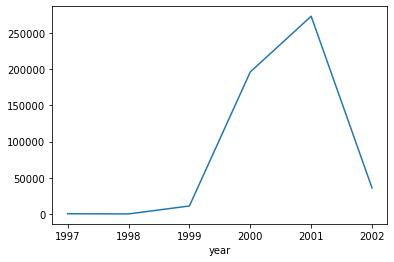

In [35]:
df.groupby('year').count()['file'].plot()

<AxesSubplot:xlabel='year', ylabel='count'>

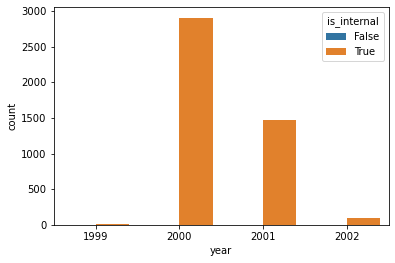

In [49]:
sns.countplot(data = df[df.poi == True], x = 'year', hue = 'is_internal')

<AxesSubplot:xlabel='year', ylabel='count'>

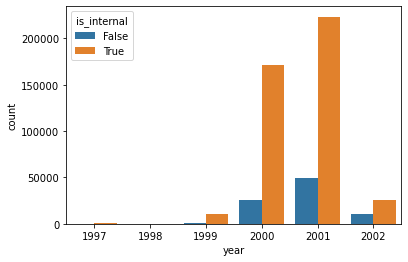

In [86]:
sns.countplot(data = df, x = 'year', hue = 'is_internal')

# What percentage of emails were sent from within the company?

In [59]:
df.is_internal.value_counts()

True     430071
False     86725
Name: is_internal, dtype: int64

In [65]:
round(df.is_internal.value_counts(normalize = True)*100)

True     83.0
False    17.0
Name: is_internal, dtype: float64

<AxesSubplot:xlabel='is_internal', ylabel='count'>

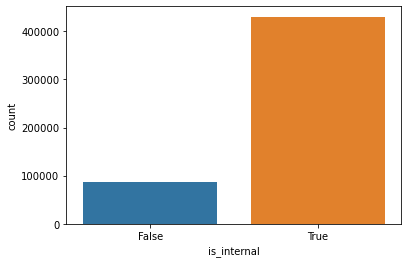

In [87]:
sns.countplot(data = df, x = 'is_internal')

In [81]:
round((df.groupby(['is_internal', 'poi']).count()['sender']/df.shape[0])*100, 2).sort_values(ascending = False)

is_internal  poi  
True         False    82.35
False        False    16.78
True         True      0.87
False        True      0.00
Name: sender, dtype: float64

#### Email breakdown by internal/external and poi/nonpoi
- 82% sent from within the company by non-poi
- 16% sent from outside the company by non-poi
- .8% sent internally by a poi
- hardly any emails sent externally by poi

In [50]:
df[df.poi == True].is_internal.value_counts()

True     4488
False       6
Name: is_internal, dtype: int64

#### Only x6 poi emails were sent from outside of the company. These may be interesting to come back and look at.

<AxesSubplot:xlabel='poi', ylabel='count'>

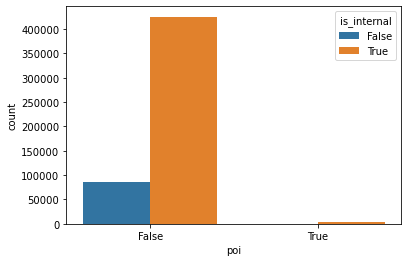

In [90]:
sns.countplot(data = df, x = 'poi', hue = 'is_internal')

# What percentage of total emails were sent by a Person of Interest?

In [22]:
df.poi.value_counts()

False    512302
True       4494
Name: poi, dtype: int64

In [21]:
print(f'{round(df.poi.mean() * 100, 2)}% of emails were sent by a Person of Interest.')

0.87% of emails were sent by a Person of Interest.


<AxesSubplot:xlabel='poi', ylabel='count'>

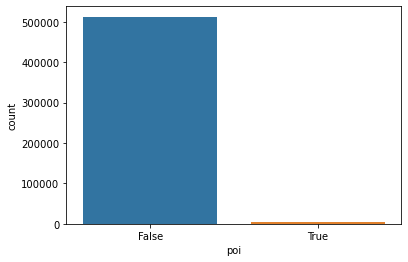

In [91]:
sns.countplot(data = df, x = 'poi')

# How did the sentiment scores change over the years?

In [102]:
# pulling in df step back to add back the full date column to work with ts plotting
df2 = pd.read_csv('csv_files/sentiment.csv')
df2.head()

,Unnamed: 0,file,message,date,sender,subject,content,clean,tokenize,stop_words,lemmatize,sentiment
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN,Here is our forecast\n\n,here is our forecast\n\n,here is our forecast,forecast,forecast,0.0000
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400


In [106]:
df.date = pd.to_datetime(df2.date, utc = True)

df.head()

,file,sender,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,time,date
0,allen-p/_sent_mail/1.,phillip.allen@enron.com,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,23:39:00,2001-05-14 23:39:00+00:00
1,allen-p/_sent_mail/10.,phillip.allen@enron.com,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,20:51:00,2001-05-04 20:51:00+00:00
2,allen-p/_sent_mail/100.,phillip.allen@enron.com,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,10:00:00,2000-10-18 10:00:00+00:00
3,allen-p/_sent_mail/1000.,phillip.allen@enron.com,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,13:13:00,2000-10-23 13:13:00+00:00
4,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,12:07:00,2000-08-31 12:07:00+00:00


In [109]:
# creating a ts dataframe for time series analysis
ts = df.set_index('date')

ts.head()

,file,sender,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,time
date,,,,,,,,,,,,
2001-05-14 23:39:00+00:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,23:39:00
2001-05-04 20:51:00+00:00,allen-p/_sent_mail/10.,phillip.allen@enron.com,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,20:51:00
2000-10-18 10:00:00+00:00,allen-p/_sent_mail/100.,phillip.allen@enron.com,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,10:00:00
2000-10-23 13:13:00+00:00,allen-p/_sent_mail/1000.,phillip.allen@enron.com,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,13:13:00
2000-08-31 12:07:00+00:00,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,12:07:00


Text(0.5, 1.0, 'by Day')

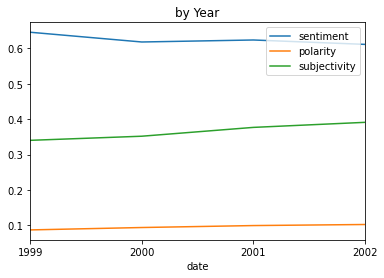

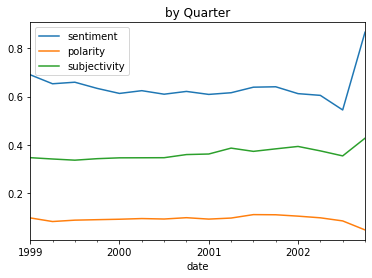

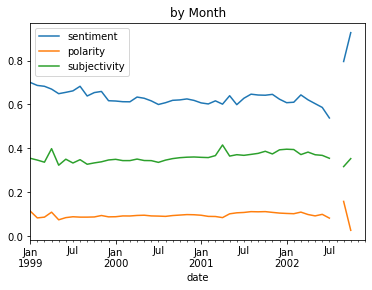

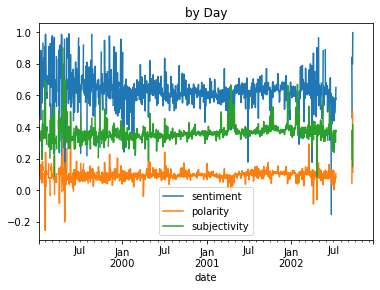

In [126]:
# looking at sentiment scores over time
ts.loc['1999':'2002'].resample('Y').mean()[['sentiment', 'polarity', 'subjectivity']].plot()
plt.title('by Year')

ts.loc['1999':'2002'].resample('Q').mean()[['sentiment', 'polarity', 'subjectivity']].plot()
plt.title('by Quarter')

ts.loc['1999':'2002'].resample('M').mean()[['sentiment', 'polarity', 'subjectivity']].plot()
plt.title('by Month')

ts.loc['1999':'2002'].resample('D').mean()[['sentiment', 'polarity', 'subjectivity']].plot()
plt.title('by Day')

In [128]:
# looking at the date ranges
ts.index.max(), ts.index.min()

(Timestamp('2024-05-26 10:49:57+0000', tz='UTC'),
 Timestamp('1980-01-01 00:00:00+0000', tz='UTC'))

In [132]:
# slicing the data to only show 1998 - 2002
ts = ts.loc['1998':'2003']

# verifying date ranges
print(ts.index.min(), ts.index.max())

1998-01-04 17:46:00+00:00 2002-12-21 08:24:45+00:00


<AxesSubplot:ylabel='Count'>

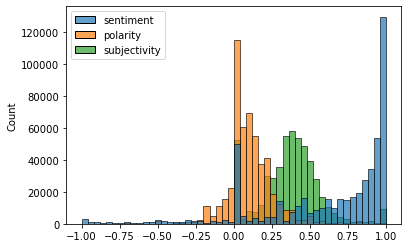

In [160]:
# looking at the distribution of sentiment scores
sns.histplot(ts[['sentiment', 'polarity', 'subjectivity']], bins=50, alpha = .7)

In [144]:
ts.groupby(ts.index.year).mean()[['sentiment', 'polarity', 'subjectivity']]

,sentiment,polarity,subjectivity
date,,,
1998,0.642976,0.085513,0.342843
1999,0.645550,0.087447,0.340366
2000,0.618033,0.094217,0.352002
2001,0.623686,0.099729,0.376918
2002,0.611293,0.102742,0.391181


<AxesSubplot:xlabel='date'>

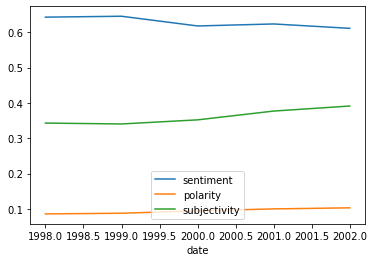

In [151]:
ts.groupby(ts.index.year).mean()[['sentiment', 'polarity', 'subjectivity']].plot()

<AxesSubplot:xlabel='date'>

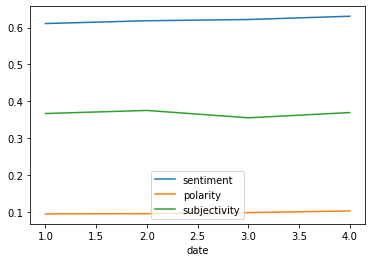

In [150]:
ts.groupby(ts.index.quarter).mean()[['sentiment', 'polarity', 'subjectivity']].plot()

<AxesSubplot:xlabel='date'>

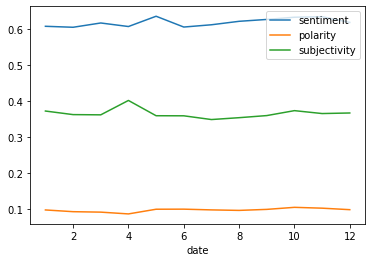

In [149]:
ts.groupby(ts.index.month).mean()[['sentiment', 'polarity', 'subjectivity']].plot()

<AxesSubplot:xlabel='date'>

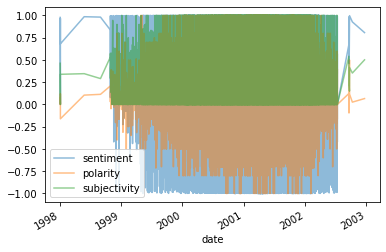

In [167]:
ts[['sentiment', 'polarity', 'subjectivity']].plot(alpha = .5)

### Can zoom in to particular times of interest

<AxesSubplot:xlabel='date'>

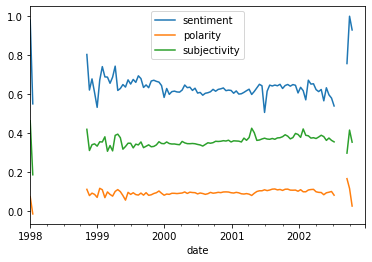

In [169]:
ts[['sentiment', 'polarity', 'subjectivity']].resample('2W').mean().plot()

<AxesSubplot:xlabel='date'>

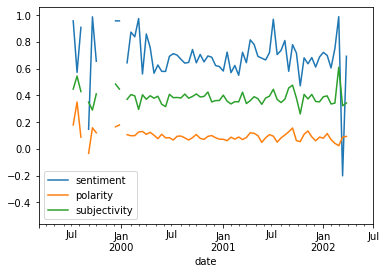

In [308]:
ts[ts.poi == True][['sentiment', 'polarity', 'subjectivity']].resample('2W').mean().plot()

<AxesSubplot:xlabel='date'>

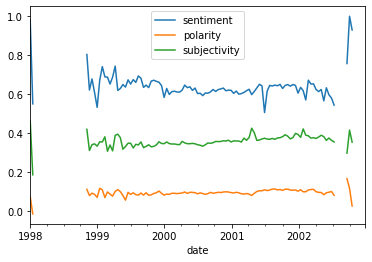

In [309]:
ts[ts.poi == False][['sentiment', 'polarity', 'subjectivity']].resample('2W').mean().plot()

<AxesSubplot:xlabel='date'>

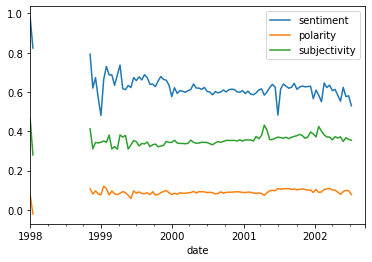

In [310]:
ts[ts.is_internal == True][['sentiment', 'polarity', 'subjectivity']].resample('2W').mean().plot()

<AxesSubplot:xlabel='date'>

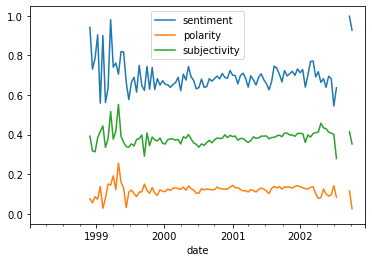

In [311]:
ts[ts.is_internal == False][['sentiment', 'polarity', 'subjectivity']].resample('2W').mean().plot()

<AxesSubplot:xlabel='date'>

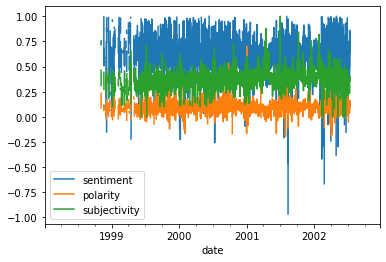

In [170]:
ts[['sentiment', 'polarity', 'subjectivity']].resample('6H').mean().plot()

In [180]:
ts[['poi', 'is_internal']].resample('Y').mean()

,poi,is_internal
date,,
1998-12-31 00:00:00+00:00,0.000000,0.903955
1999-12-31 00:00:00+00:00,0.001346,0.864770
2000-12-31 00:00:00+00:00,0.014600,0.848926
2001-12-31 00:00:00+00:00,0.005330,0.825745
2002-12-31 00:00:00+00:00,0.004284,0.778002


<AxesSubplot:ylabel='date'>

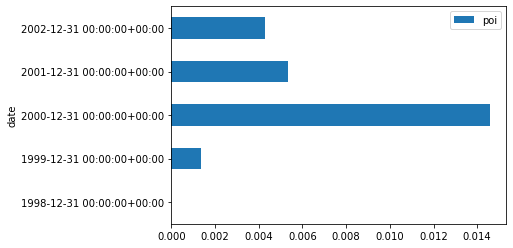

In [189]:
ts[['poi']].resample('Y').mean().plot.barh()

<AxesSubplot:ylabel='date'>

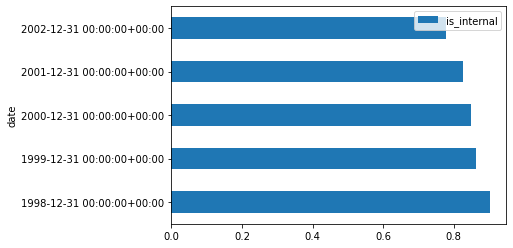

In [188]:
ts[['is_internal']].resample('Y').mean().plot.barh()

# What are the average sentiment scores for each year?

<AxesSubplot:xlabel='year'>

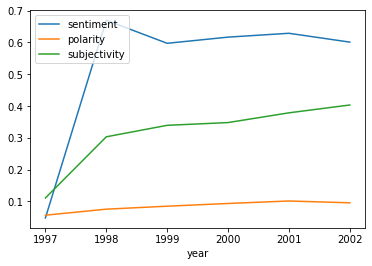

In [207]:
# sentiment
ts.groupby('year').mean()[['sentiment', 'polarity', 'subjectivity']].plot()

In [213]:
round(ts.groupby('year').mean()[['sentiment', 'polarity', 'subjectivity']], 2)

,sentiment,polarity,subjectivity
year,,,
1997,0.05,0.06,0.11
1998,0.67,0.08,0.30
1999,0.60,0.08,0.34
2000,0.62,0.09,0.35
2001,0.63,0.10,0.38
2002,0.60,0.10,0.40


# What are the top topics by year?

In [216]:
# filtering for poi
poi = df[df.poi == True]
poi.head()

,file,sender,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,time,date
1037,allen-p/all_documents/50.,tim.belden@enron.com,---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True,2000,12,06:42:00,2001-02-23 16:24:00+00:00
1277,allen-p/deleted_items/149.,jeff.richter@enron.com,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,True,2001,10,14:44:39,2001-10-22 23:36:13+00:00
1687,allen-p/discussion_threads/190.,tim.belden@enron.com,---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True,2000,12,06:42:00,2000-11-16 14:51:00+00:00
2093,allen-p/notes_inbox/40.,tim.belden@enron.com,---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True,2000,12,06:42:00,2000-12-13 07:38:00+00:00
8621,badeer-r/all_documents/101.,tim.belden@enron.com,check this out and let everyone know what's up...,check let everyone know ' forwarded tim belden...,0.9756,0.013605,0.358503,True,True,2000,8,21:12:00,2000-06-27 20:21:00+00:00


#### Noticeable difference in sentiment score trends for overall population vs just poi
Poi downhill

<AxesSubplot:xlabel='year'>

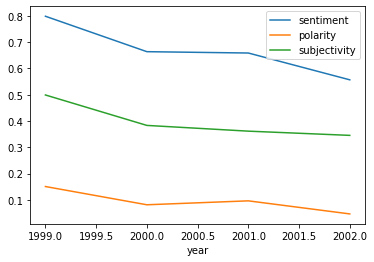

In [217]:
# sentiment for poi
poi.groupby('year').mean()[['sentiment', 'polarity', 'subjectivity']].plot()

In [218]:
poi.groupby('year').mean()[['sentiment', 'polarity', 'subjectivity']]

,sentiment,polarity,subjectivity
year,,,
1999,0.798567,0.150423,0.498899
2000,0.663687,0.080954,0.383046
2001,0.658594,0.095924,0.361186
2002,0.556558,0.046167,0.345128


# Topic Modeling

In [244]:
# creating a list of strings for the series of poi emails
emails_2000 = list(poi[poi.year == 2000].lemmatize)

In [231]:
# creating bert topic model object
model = BERTopic(language = 'english')

In [245]:
# running list of emails through bert topic model algo
topics_2000, probs_2000 = model.fit_transform(emails_2000)

In [246]:
model.get_topics()

{-1: [('rio', 0.010621301893220456),
  ('tennessee', 0.010276783257783239),
  ('contribution', 0.009857710168540515),
  ('esa', 0.008244539082774258),
  ('barbara', 0.008162190251469328),
  ('pm', 0.00761555420334344),
  ('enron', 0.007574419803743401),
  ('receipt', 0.007570580843800675),
  ('david', 0.00729766191605551),
  ('political', 0.007180839887579341)],
 0: [('survey', 0.01941094716316901),
  ('pulse', 0.01771245777071905),
  ('employee', 0.012511555509840152),
  ('20', 0.011697825601163378),
  ('participation', 0.011672169515004967),
  ('meh', 0.009184739457656289),
  ('quarter', 0.009066927070314175),
  ('august', 0.009024840036351399),
  ('date', 0.008955032602961864),
  ('group', 0.008952706077608546)],
 1: [('mm', 0.026552788816790865),
  ('embedded', 0.01927075372569193),
  ('investment', 0.017584730549548122),
  ('commodity', 0.016205224908207878),
  ('financing', 0.015874680787022703),
  ('10312000', 0.015820566320836865),
  ('706', 0.015653902323066692),
  ('fcel', 0.

In [287]:
model.get_topic_info()

,Topic,Count,Name
0,-1,195,-1_rio_tennessee_contribution_esa
2,0,55,0_survey_pulse_employee_20
1,1,55,1_mm_embedded_investment_commodity
3,2,51,2_aug_michelle_brigham_december
4,3,46,3_project_cuiaba_jose_sempra
...,...,...,...
108,118,12,118_08312000_girl_12mm_expires
107,120,12,120_guy_griffin_chrome_ob
126,125,11,125_pipeline_eol_arc_transportation
127,126,11,126_fort_west_amortization_trading


In [248]:
model.visualize_topics()

In [294]:
def topic_model(year_):
    '''
    
    '''
    emails = list(poi[poi.year == year_].lemmatize)
    
    model = BERTopic(language = 'english', nr_topics = 'auto')
    
    topics, probs = model.fit_transform(emails)
    
    return model.get_topic_info()

In [296]:
topic_model(1999)

IndexError: list index out of range

In [295]:
pd.set_option('display.max_rows', None)

topic_model(2000)

,Topic,Count,Name
0,0,1945,0_david_pm_subject_enron
1,-1,160,-1_communication_communicationsenron_equipment...
2,1,55,1_mm_embedded_investment_commodity
3,2,40,2_project_cuiaba_jose_sempra
4,3,32,3_staff_transmission_commission_tlrs
5,4,28,4_rfp_ontario_nug_milnthorp
6,5,27,5_ttc_outage_transfer_mneeleycaisocom
7,6,27,6_memo_draft_tommorrow_12062000
8,7,26,7_tva_ike_settlement_dialogue
9,8,26,8_rfp_lillian_09272000_carroll


In [297]:
topic_model(2001)

,Topic,Count,Name
0,-1,327,-1_gas_coal_subject_pm
1,0,227,0_20_meeting_please_communicationsenron
2,1,104,1_david_02062001_pm_forwarded
3,2,82,2_regard_delainey_thxs_note
4,3,79,3_dwr_jeff_puc_enron
5,4,61,4_program_associateanalyst_enron_company
6,5,50,5_income_ice_commercial_balance
7,6,38,6_affiliate_fidelity_enron_duke
8,7,31,7_california_power_energy_utility
10,8,28,8_email_anthrax_information_suspicious


In [299]:
topic_model(2002)

,Topic,Count,Name
0,0,34,0_january_sent_john_message
1,-1,21,-1_section_employee_without_cause
2,1,17,1_approval_meeting_judge_ubs
3,2,12,2_trading_position_assistant_interest
4,3,11,3_ubs_warburg_enron_people


In [313]:
poi.head()

,file,sender,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,time,date
1037,allen-p/all_documents/50.,tim.belden@enron.com,---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True,2000,12,06:42:00,2001-02-23 16:24:00+00:00
1277,allen-p/deleted_items/149.,jeff.richter@enron.com,"Phillip,\n\nWhich one should I do, the 8x12 is...",phillip one 8x12 half price jeff original mess...,0.9831,0.065981,0.428776,True,True,2001,10,14:44:39,2001-10-22 23:36:13+00:00
1687,allen-p/discussion_threads/190.,tim.belden@enron.com,---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True,2000,12,06:42:00,2000-11-16 14:51:00+00:00
2093,allen-p/notes_inbox/40.,tim.belden@enron.com,---------------------- Forwarded by Tim Belden...,forwarded tim beldenhouect 12052000 0544 krist...,0.0000,-0.015152,0.393939,True,True,2000,12,06:42:00,2000-12-13 07:38:00+00:00
8621,badeer-r/all_documents/101.,tim.belden@enron.com,check this out and let everyone know what's up...,check let everyone know ' forwarded tim belden...,0.9756,0.013605,0.358503,True,True,2000,8,21:12:00,2000-06-27 20:21:00+00:00


In [328]:
poi.sort_values(by = 'polarity').tail()

,file,sender,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,time,date
91258,delainey-d/sent/428.,david.delainey@enron.com,"Jennifer, you are very welcome and I look forw...",jennifer welcome look forward continuing work ...,0.8020,0.9,0.6,True,True,2000,7,18:37:00,2000-08-21 10:25:00+00:00
88577,delainey-d/_sent_mail/427.,david.delainey@enron.com,"Jennifer, you are very welcome and I look forw...",jennifer welcome look forward continuing work ...,0.8020,0.9,0.6,True,True,2000,7,18:37:00,2000-08-18 10:26:00+00:00
89819,delainey-d/all_documents/767.,david.delainey@enron.com,thxs for the note - all the best\n\nregards\nd...,thxs note best regard delainey,0.6369,1.0,0.3,True,True,2001,2,10:04:00,2000-05-17 08:42:00+00:00
91595,delainey-d/sent/736.,david.delainey@enron.com,thxs for the note - all the best\n\nregards\nd...,thxs note best regard delainey,0.6369,1.0,0.3,True,True,2001,2,10:04:00,2000-05-17 09:49:00+00:00
88910,delainey-d/_sent_mail/731.,david.delainey@enron.com,thxs for the note - all the best\n\nregards\nd...,thxs note best regard delainey,0.6369,1.0,0.3,True,True,2001,2,10:04:00,2000-05-15 18:33:00+00:00


<AxesSubplot:ylabel='sender'>

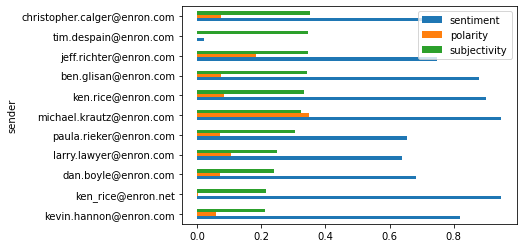

In [342]:
poi.groupby('sender').mean().sort_values(by = 'subjectivity')[['sentiment', 'polarity', 'subjectivity']].iloc[:11].plot.barh()

<AxesSubplot:ylabel='sender'>

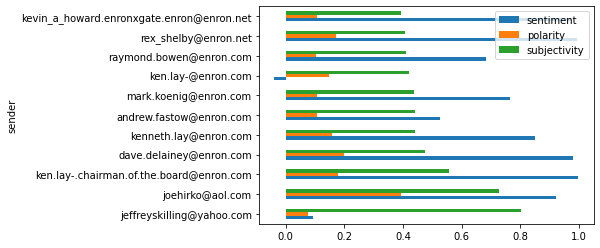

In [341]:
poi.groupby('sender').mean().sort_values(by = 'subjectivity', ascending = False)[['sentiment', 'polarity', 'subjectivity']].iloc[:11].plot.barh()

In [326]:
print(poi.loc[498499].content)

---------------------- Forwarded by David W Delainey/HOU/EES on 05/17/2001 
08:47 AM ---------------------------


Ken Rice@ENRON COMMUNICATIONS
05/16/2001 09:34 AM
To: David W Delainey/HOU/EES@EES
cc: Kevin Hannon/Enron Communications@Enron Communications 
Subject: FW: DARWIN AWARDS

Delainey

Why is it that a Canadian always seems to win the Darwin Awards?

Ken

----- Forwarded by Ken Rice/Enron Communications on 05/16/01 09:26 AM -----

	donrs@donrs.com
	05/16/01 08:46 AM
		 
		 To: RMSherrill@duke-energy.com, lance_riley@anadarko.com, Ken Rice/Enron 
Communications@Enron Communications, alinbeck@redstonegroup.com
		 cc: 
		 Subject: FW: DARWIN AWARDS





-----Original Message-----
From: Bob and Sharyn Perkins [mailto:bsbprkns@jump.net]
Sent: Tuesday, May 15, 2001 9:04 PM
To: Undisclosed-Recipient:;
Subject: Fw: DARWIN AWARDS



Read it and shake your head in wonder.
> Subject: FW: DARWIN AWARDS
>
>
> >> Hot off the press! The 2000-2001 Darwin Awards
> Are Here!! > The latest
> >> 

In [343]:
df.head()

,file,sender,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,time,date
0,allen-p/_sent_mail/1.,phillip.allen@enron.com,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,23:39:00,2001-05-14 23:39:00+00:00
1,allen-p/_sent_mail/10.,phillip.allen@enron.com,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,20:51:00,2001-05-04 20:51:00+00:00
2,allen-p/_sent_mail/100.,phillip.allen@enron.com,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,10:00:00,2000-10-18 10:00:00+00:00
3,allen-p/_sent_mail/1000.,phillip.allen@enron.com,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,13:13:00,2000-10-23 13:13:00+00:00
4,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,12:07:00,2000-08-31 12:07:00+00:00


In [344]:
def line_plot(df, x_val, y_val, hue = None):
    '''
    
    '''
    
    sns.lineplot(data = df, x = x_val, y = y_val, hue = hue)

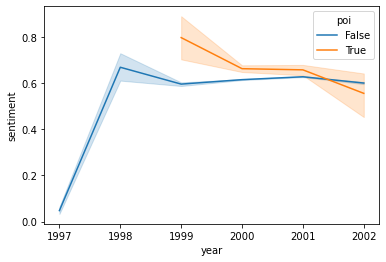

In [347]:
line_plot(df, 'year', 'sentiment', hue = 'poi')

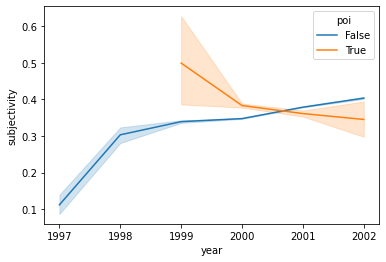

In [349]:
line_plot(df, 'year', 'subjectivity', hue = 'poi')

<AxesSubplot:xlabel='year', ylabel='sentiment'>

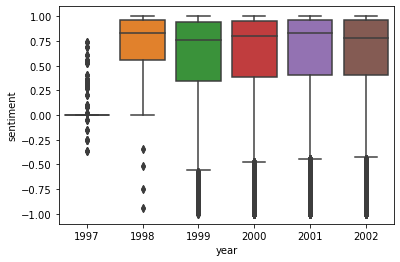

In [351]:
sns.boxplot(x = 'year', y='sentiment', data = df)

<AxesSubplot:xlabel='year', ylabel='polarity'>

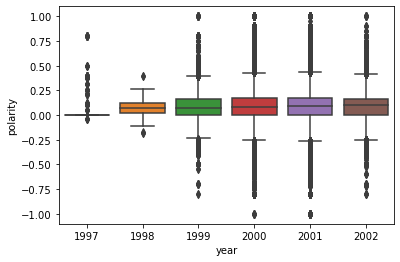

In [352]:
sns.boxplot(x = 'year', y='polarity', data = df)

<AxesSubplot:xlabel='year', ylabel='subjectivity'>

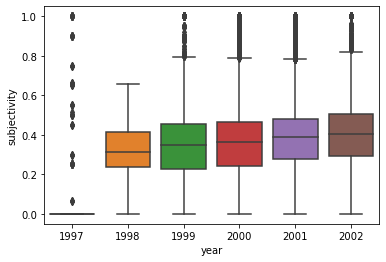

In [353]:
sns.boxplot(x = 'year', y='subjectivity', data = df)

<AxesSubplot:xlabel='sentiment', ylabel='sender'>

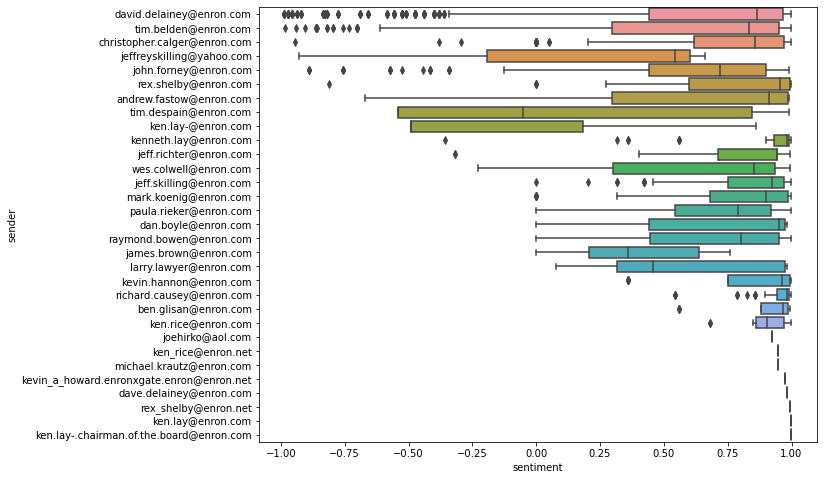

In [361]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'sentiment', y='sender', data = poi.sort_values(by = 'sentiment'))

<AxesSubplot:ylabel='sender'>

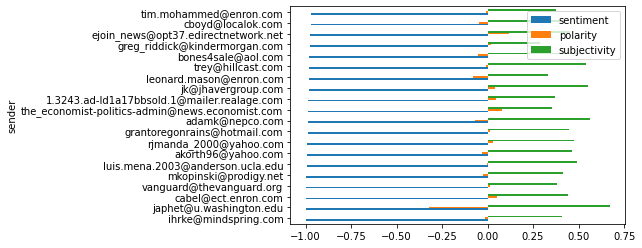

In [375]:
df.groupby('sender').mean().sort_values(by = 'sentiment')[['sentiment', 'polarity', 'subjectivity']].head(20)\
            .plot.barh()

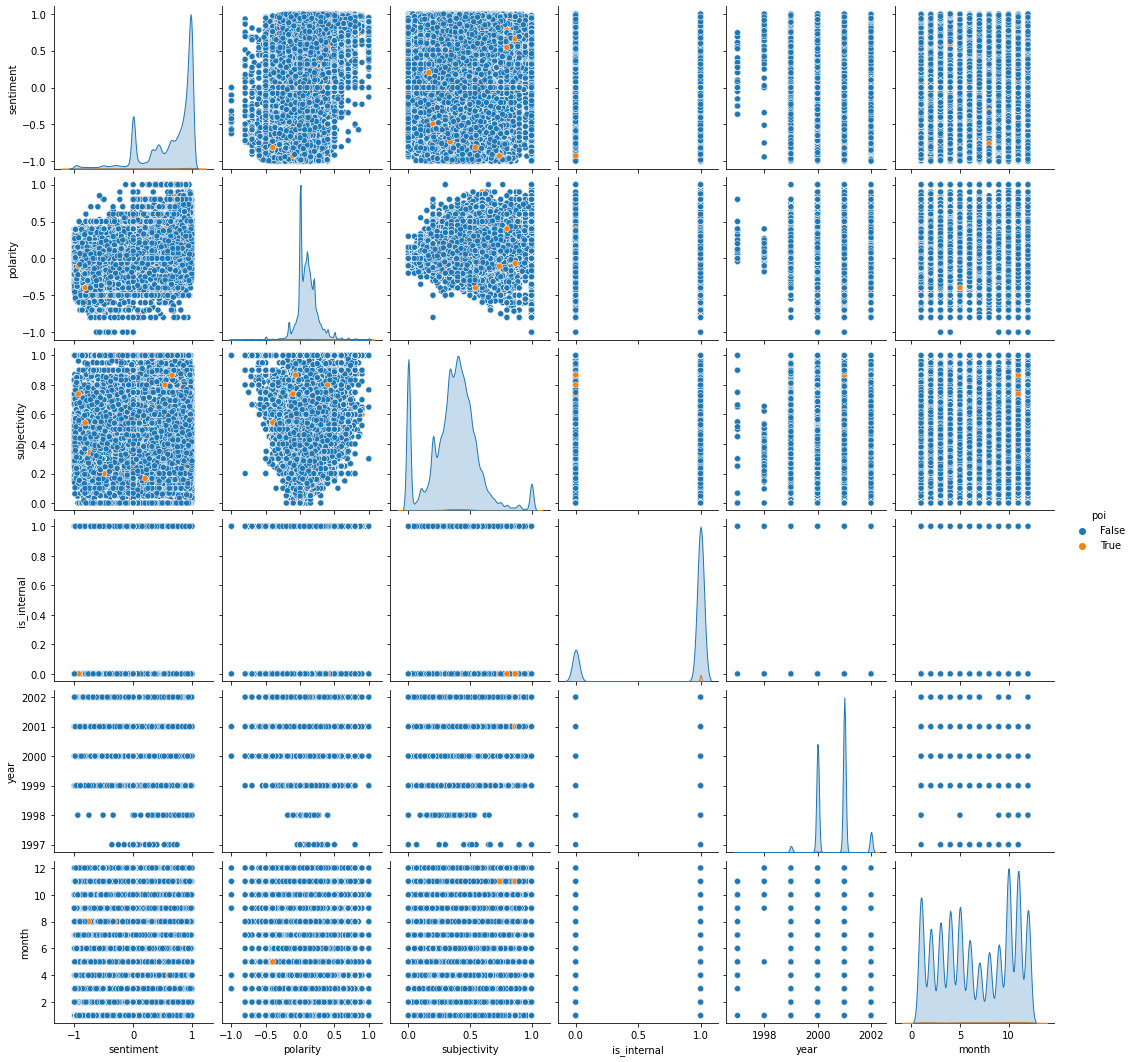

In [378]:
sns.pairplot(data = df, hue = 'poi')

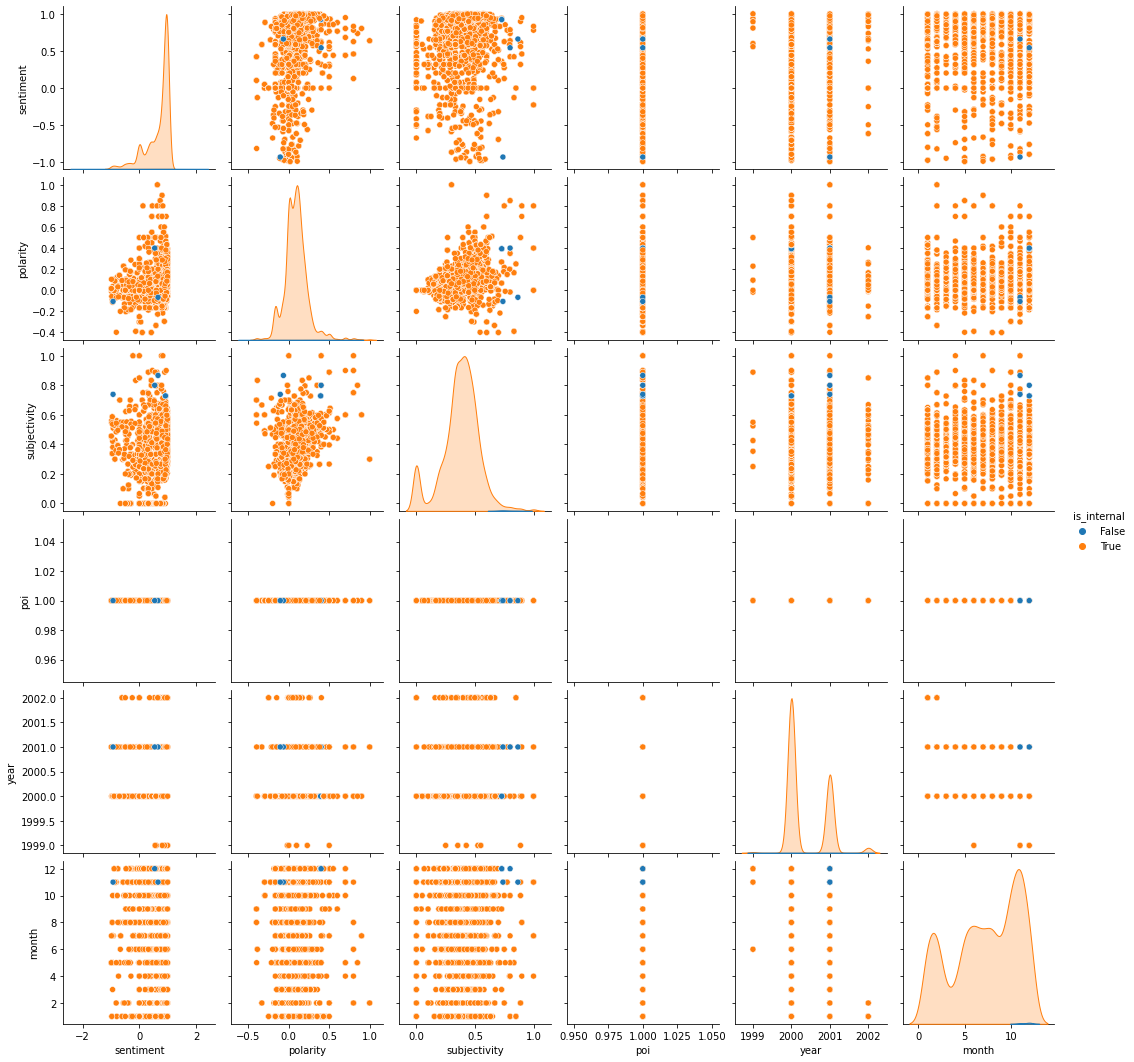

In [380]:
sns.pairplot(data = poi, hue = 'is_internal')

In [381]:
poi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4494 entries, 1037 to 515763
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   file          4494 non-null   object             
 1   sender        4494 non-null   object             
 2   content       4494 non-null   object             
 3   lemmatize     4494 non-null   object             
 4   sentiment     4494 non-null   float64            
 5   polarity      4494 non-null   float64            
 6   subjectivity  4494 non-null   float64            
 7   poi           4494 non-null   bool               
 8   is_internal   4494 non-null   bool               
 9   year          4494 non-null   int64              
 10  month         4494 non-null   int64              
 11  time          4494 non-null   object             
 12  date          4494 non-null   datetime64[ns, UTC]
dtypes: bool(2), datetime64[ns, UTC](1), float64(3), int64(2), 

In [382]:
poi.to_csv('poi.csv')